# Digit recognition using tesseract approach
At the moment this method recognises all the digits in the examples, however it is very slow.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import operator

import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

(300, 300)

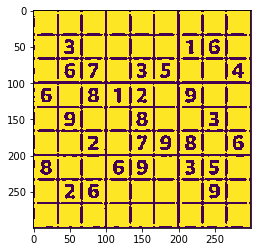

In [2]:
img_raw = cv2.imread('Resources/first.jpg')
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img_gray, (7, 7), 0)
img = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(img)
img.shape

In [3]:
top_left, top_right, bottom_right, bottom_left = [0,0], [img.shape[0]-1,0], [img.shape[0]-1,img.shape[1]-1], [0,img.shape[1]-1]

In [4]:
src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32')
#src

In [5]:
def distance_between(p1, p2):
    """Returns the scalar distance between two points"""
    a = p2[0] - p1[0]
    b = p2[1] - p1[1]
    return np.sqrt((a ** 2) + (b ** 2))

In [6]:
side = max([
    distance_between(bottom_right, top_right),
    distance_between(top_left, bottom_left),
    distance_between(bottom_right, bottom_left),
    distance_between(top_left, top_right)
])

In [7]:
squares = []
side = img.shape[:1]
side = side[0] / 9


In [8]:
for j in range(9):
        for i in range(9):
            squares.append(img[i*int(side)+5:(i+1)*int(side), j*int(side)+5:(j+1)*int(side)])


'8'

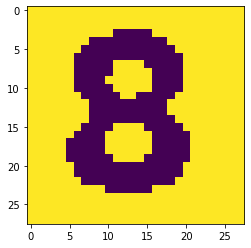

In [13]:
plt.imshow(squares[6]);
conf = r'--oem 3 --psm 6 outputbase digits'
pytesseract.image_to_string(squares[6],config=conf).strip()

In [10]:
def read_number(square):
    conf = r'--oem 3 --psm 6 outputbase digits'
    result = pytesseract.image_to_string(square,config=conf).strip()
    try:
        result = int(result)
        if result in range(10):
            return result
    except:
        return 0


In [11]:
r = map(read_number, squares)

In [16]:
r = []
for i in range(len(squares)):
    r.append(read_number(squares[i]))

In [17]:
Sudoku_out = []
Sudoku_out = np.array(r).reshape((9,9)).transpose()

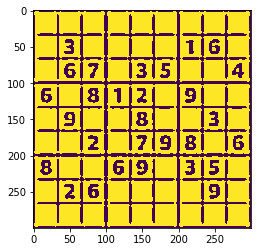

In [18]:
img = cv2.imread('Resources/first.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.GaussianBlur(img, (9, 9), 0)
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(img)

# Sudoku Solver with Backtracking

In [19]:
def print_puzzle(pz):
    for i in range(len(pz)):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - - - ")

        for j in range(len(pz[0])):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")

            if j == 8:
                print(pz[i][j])
            else:
                print(str(pz[i][j]) + " ", end="")

In [20]:
def solve(pz):
    find = find_empty(pz)
    if not find:
        return True
    else:
        row, col = find

    for i in range(1,10):
        if valid(pz, i, (row, col)):
            pz[row][col] = i

            if solve(pz):
                return True

            pz[row][col] = 0

    return False


def valid(pz, num, pos):
    # Check row
    for j in range(len(pz[0])):
        if pz[pos[0]][j] == num and pos[1] != j:
            return False

    # Check column
    for i in range(len(pz)):
        if pz[i][pos[1]] == num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if pz[i][j] == num and (i,j) != pos:
                return False

    return True


def find_empty(pz):
    for i in range(len(pz)):
        for j in range(len(pz[0])):
            if pz[i][j] == 0:
                return (i, j)  # row, col

    return None

In [21]:
solve(Sudoku_out)
print_puzzle(Sudoku_out)

4 8 9  | 2 6 1  | 5 7 3
2 3 5  | 8 4 7  | 1 6 9
1 6 7  | 9 3 5  | 2 8 4
- - - - - - - - - - - - - 
6 7 8  | 1 2 3  | 9 4 5
5 9 1  | 4 8 6  | 7 3 2
3 4 2  | 5 7 9  | 8 1 6
- - - - - - - - - - - - - 
8 1 4  | 6 9 2  | 3 5 7
7 2 6  | 3 5 8  | 4 9 1
9 5 3  | 7 1 4  | 6 2 8
